In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import datetime

In [2]:
#filepath for external data
filepath = "../data/external/the-movies-dataset/"

In [3]:
movies_metadata_df = pd.read_csv(filepath + "movies_metadata.csv")

C:\Users\Link\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
movies_metadata_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
len(movies_metadata_df)

45466

In [6]:
print(movies_metadata_df.columns)
print(f"Number of columns: {len(movies_metadata_df.columns)}")
print(*map(type, movies_metadata_df.columns))

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
Number of columns: 24
<class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'>


## Checking for missing data

In [7]:
# Total missing data per column
movies_na = movies_metadata_df.isna().sum()
movies_na

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### Percentage of missing data per column

In [8]:
(movies_na / len(movies_metadata_df)) * 100

adult                     0.000000
belongs_to_collection    90.115691
budget                    0.000000
genres                    0.000000
homepage                 82.883913
id                        0.000000
imdb_id                   0.037391
original_language         0.024194
original_title            0.000000
overview                  2.098271
popularity                0.010997
poster_path               0.848986
production_companies      0.006598
production_countries      0.006598
release_date              0.191352
revenue                   0.013197
runtime                   0.578454
spoken_languages          0.013197
status                    0.191352
tagline                  55.104914
title                     0.013197
video                     0.013197
vote_average              0.013197
vote_count                0.013197
dtype: float64

## Exploring belongs_to_collection 

In [9]:
collection_col = movies_metadata_df['belongs_to_collection']

In [10]:
collection_col.head()

0    {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                  NaN
2    {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                  NaN
4    {'id': 96871, 'name': 'Father of the Bride Col...
Name: belongs_to_collection, dtype: object

In [11]:
collection_col[0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [12]:
collection_col[2]

"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}"

## Removing the 'belongs_to_collection' column
* Since 90% of the 'belongs_to_collection' column is missing data, this collumn will be dropped.
* Also, there appears to be redundant info in this column so it should be safe to remove.
* Could potentially convert this column into a categorical feature  

## Exploring homepage

In [13]:
homepage_col = movies_metadata_df['homepage']

In [14]:
homepage_col.head()

0    http://toystory.disney.com/toy-story
1                                     NaN
2                                     NaN
3                                     NaN
4                                     NaN
Name: homepage, dtype: object

## Removing homepage
* Over 80% of the data is missing
* It is just links to the movie's website
* Could potentially use this for classification to see if a website makes a difference on success, but not enough data

## Exploring tagline

In [15]:
tagline_col = movies_metadata_df['tagline']

In [16]:
tagline_col

0                                                      NaN
1                Roll the dice and unleash the excitement!
2        Still Yelling. Still Fighting. Still Ready for...
3        Friends are the people who let you be yourself...
4        Just When His World Is Back To Normal... He's ...
5                                 A Los Angeles Crime Saga
6        You are cordially invited to the most surprisi...
7                                   The Original Bad Boys.
8                               Terror goes into overtime.
9                     No limits. No fears. No substitutes.
10       Why can't the most powerful man in the world h...
11                                                     NaN
12                          Part Dog. Part Wolf. All Hero.
13       Triumphant in Victory, Bitter in Defeat. He Ch...
14       The Course Has Been Set. There Is No Turning B...
15                        No one stays at the top forever.
16                Lose your heart and come to your sense

## Removing tagline
* 55% missing values, though it could just be some movies don't have taglines
* Could run analysis to see if certain keywords, phrases or sentiment affect success. Could possibly use for nlp.
* Could use web scraping to find the missing taglines

## Exploring imdb_id

In [17]:
imdb_id_col = movies_metadata_df['imdb_id']

In [18]:
movies_metadata_df.loc[movies_metadata_df.imdb_id.isna()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
8966,False,NaN,1000000,"[{'id': 80, 'name': 'Crime'}]",NaN,36337,NaN,en,Delusion,"In this fast-paced, noirish road movie, a comp...",...,1991-06-07,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,She only wanted love. But money's better than ...,Delusion,False,4.8,3.0
13757,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",NaN,200796,NaN,pl,Show,NaN,...,2003-03-19,0.0,NaN,[],Released,NaN,Show,False,6.3,2.0
13821,False,"{'id': 75014, 'name': 'How I Unleashed World W...",0,"[{'id': 10769, 'name': 'Foreign'}, {'id': 28, ...",NaN,75015,NaN,pl,Jak rozpętałem drugą wojnę światową: Cz.3 - Wś...,How I Unleashed World War II tells the story o...,...,1970-04-06,0.0,73.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,How I Unleashed World War II Part III: Among F...,False,7.0,3.0
17382,False,NaN,2500000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",http://www.delawarepictures.net/dreamkiller/,36663,NaN,en,Dreamkiller,"A team of doctors experiment with a new, highl...",...,NaN,0.0,110.0,[],Released,Fear is the greatest killer.,Dreamkiller,False,5.0,1.0
17510,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,47116,NaN,en,Víťaz,Tou former boxers meet in the ring again after...,...,1979-03-09,0.0,78.0,[],Rumored,NaN,The Winner,False,0.0,0.0
18959,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}, {'id': 16,...",NaN,28500,NaN,en,Before The Dinosaurs - Walking With Monsters,Many people think of the dinosaurs as the firs...,...,2005-11-05,0.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Before The Dinosaurs - Walking With Monsters,False,7.3,12.0
19322,False,NaN,0,[],NaN,118013,NaN,en,Endeavour,Shaun Evans (The Take) steps into John Thaw's ...,...,NaN,0.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Rookie detective Endeavor Morse faces his firs...,Endeavour,False,6.6,19.0
20806,False,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",NaN,15257,NaN,en,Hulk vs. Wolverine,Department H sends in Wolverine to track down ...,...,2009-01-27,0.0,38.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Hulk vs. Wolverine,False,6.8,48.0
20937,False,NaN,0,"[{'id': 37, 'name': 'Western'}, {'id': 28, 'na...",NaN,55576,NaN,en,Last Stand at Saber River,"As America recovers from the Civil War, one ma...",...,1997-01-19,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Last Stand at Saber River,False,3.7,3.0
21916,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,293412,NaN,en,Running Wild,Jennifer Barker plays a troubled woman who has...,...,1995-01-01,0.0,0.0,[],Released,NaN,Running Wild,False,10.0,1.0


In [19]:
movies_metadata_df.loc[movies_metadata_df['id'] == '5']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
17,False,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,...,1995-12-09,4300000.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,6.5,539.0


In [20]:
sorted_id = movies_metadata_df['id']

In [21]:
sorted_id.loc[sorted_id == '5']

17    5
Name: id, dtype: object

In [22]:
sorted_id.loc[sorted_id == '1997-08-20']

19730    1997-08-20
Name: id, dtype: object

In [23]:
movies_metadata_df.loc[movies_metadata_df['imdb_id']== '113041']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [24]:
ratings_df = pd.read_csv(filepath + "ratings.csv")

In [25]:
avg_rate_862 = ratings_df.loc[ratings_df['movieId']== 1]

In [26]:
avg_rate_862.head()

,userId,movieId,rating,timestamp
204,8,1,4.0,1013443596
317,9,1,4.5,1073837180
641,12,1,4.0,943912205
1358,20,1,4.0,1368361348
1710,24,1,4.0,979869938


In [27]:
avg_rate_862['rating'].mean()

3.8881574960610834

In [28]:
len(avg_rate_862)

66008

In [29]:
(avg_rate_862['rating'].mean() / 5)*10

7.776314992122167

## Linking the ids to compare the different rating metrics

In [30]:
links_df = pd.read_csv(filepath + "links.csv")

In [31]:
links_df.loc[links_df['tmdbId']==862]

,movieId,imdbId,tmdbId
0,1,114709,862.0


* Adding tt0 to the front of the above imdbId gives below imdb_id
* Above tmdbId equals below id

In [32]:
movies_metadata_df.loc[movies_metadata_df['id'] =='862']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [33]:
movies_metadata_df.loc[movies_metadata_df['imdb_id'] == '116985']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [34]:
beg = 'tt0'
movies_metadata_df.loc[movies_metadata_df['imdb_id'] == beg + '114709']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [35]:
ratings_group = ratings_df.groupby(['movieId'])
rating_avg = ratings_group.mean()
rating_avg.head()

,userId,rating,timestamp
movieId,,,
1,135121.043616,3.888157,1.113440e+09
2,134877.953761,3.236953,1.088621e+09
3,136520.452733,3.175550,9.661124e+08
4,136249.536062,2.875713,9.390243e+08
5,135293.275855,3.079565,9.896788e+08


In [36]:
rating_avg['adjRating'] = (rating_avg['rating']/5)*10

In [37]:
rating_avg.head()

,userId,rating,timestamp,adjRating
movieId,,,,
1,135121.043616,3.888157,1.113440e+09,7.776315
2,134877.953761,3.236953,1.088621e+09,6.473906
3,136520.452733,3.175550,9.661124e+08,6.351100
4,136249.536062,2.875713,9.390243e+08,5.751426
5,135293.275855,3.079565,9.896788e+08,6.159130


In [38]:
new_rating = rating_avg[['rating', 'adjRating']]

In [39]:
new_rating.head()

,rating,adjRating
movieId,,
1,3.888157,7.776315
2,3.236953,6.473906
3,3.175550,6.351100
4,2.875713,5.751426
5,3.079565,6.159130


In [40]:
new_rating_reset = new_rating.reset_index()

In [41]:
new_rating_reset.head()

,movieId,rating,adjRating
0,1,3.888157,7.776315
1,2,3.236953,6.473906
2,3,3.175550,6.351100
3,4,2.875713,5.751426
4,5,3.079565,6.159130


In [42]:
links_df.loc[links_df['movieId']==5]

,movieId,imdbId,tmdbId
4,5,113041,11862.0


In [43]:
movies_metadata_df.loc[movies_metadata_df['id']=='11862']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Exploring films with 0 budget

In [44]:
movies_metadata_df.loc[movies_metadata_df['budget']=='0']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
11,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,12110,tt0112896,en,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,...,1995-12-22,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Dracula: Dead and Loving It,False,5.7,210.0
12,False,"{'id': 117693, 'name': 'Balto Collection', 'po...",0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,21032,tt0112453,en,Balto,An outcast half-wolf risks his life to prevent...,...,1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,False,7.1,423.0
21,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,1710,tt0112722,en,Copycat,An agoraphobic psychologist and a female detec...,...,1995-10-27,0.0,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One man is copying the most notorious killers ...,Copycat,False,6.5,199.0
23,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",NaN,12665,tt0114168,en,Powder,Harassed by classmates who won't accept his sh...,...,1995-10-27,0.0,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An extraordinary encounter with another human ...,Powder,False,6.3,143.0
25,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,16420,tt0114057,en,Othello,The evil Iago pretends to be friend of Othello...,...,1995-12-15,0.0,123.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Envy, greed, jealousy and love.",Othello,False,7.0,33.0
27,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,17015,tt0114117,en,Persuasion,This film adaptation of Jane Austen's last nov...,...,1995-09-27,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Persuasion,False,7.4,36.0
29,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,37557,tt0115012,zh,摇啊摇，摇到外婆桥,A provincial boy related to a Shanghai crime f...,...,1995-04-30,0.0,108.0,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,In 1930's Shanghai violence was not the proble...,Shanghai Triad,False,6.5,17.0


In [45]:
#Films that do have a budget
movies_metadata_df.loc[movies_metadata_df['budget']!='0']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
10,False,NaN,62000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9087,tt0112346,en,The American President,"Widowed U.S. president Andrew Shepherd, one of...",...,1995-11-17,107879496.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why can't the most powerful man in the world h...,The American President,False,6.5,199.0
13,False,NaN,44000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",NaN,10858,tt0113987,en,Nixon,An all-star cast powers this epic look at Amer...,...,1995-12-22,13681765.0,192.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Triumphant in Victory, Bitter in Defeat. He Ch...",Nixon,False,7.1,72.0
14,False,NaN,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,1995-12-22,10017322.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0


# Budget data seems to be missing

### Percent of films with non-zero budget

In [46]:
(len(movies_metadata_df.loc[movies_metadata_df['budget']!='0'])/len(movies_metadata_df)) *100

19.559670962917345

### Percent of films with zero budget

In [47]:
(len(movies_metadata_df.loc[movies_metadata_df['budget']=='0'])/len(movies_metadata_df)) * 100

80.44032903708266

In [48]:
movies_metadata_df.loc[movies_metadata_df['original_title'] == 'Space Jam']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
662,False,NaN,80000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://www.warnerbros.com/archive/spacejam/mov...,2300,tt0117705,en,Space Jam,In a desperate attempt to win a basketball mat...,...,1996-11-15,250200000.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Get ready to jam.,Space Jam,False,6.5,1335.0


In [49]:
movies_metadata_df.loc[movies_metadata_df['original_title'] == 'Flubber']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1622,False,NaN,80000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,9574,tt0119137,en,Flubber,"Professor Phillip Brainard, an absent minded p...",...,1997-11-26,177977226.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Catch it if you can!,Flubber,False,5.3,707.0


In [50]:
# 177993801 - 177977226.0


In [51]:
#Non zero revenue
(len(movies_metadata_df.loc[movies_metadata_df['revenue']!= 0])/len(movies_metadata_df))*100

16.306690713940085

In [52]:
#movies_metadata_df.revenue

In [53]:
#Revenue and budget non zero
movies_metadata_df.loc[(movies_metadata_df['budget']!='0')&(movies_metadata_df['revenue']!=0)]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
10,False,NaN,62000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9087,tt0112346,en,The American President,"Widowed U.S. president Andrew Shepherd, one of...",...,1995-11-17,107879496.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why can't the most powerful man in the world h...,The American President,False,6.5,199.0
13,False,NaN,44000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",NaN,10858,tt0113987,en,Nixon,An all-star cast powers this epic look at Amer...,...,1995-12-22,13681765.0,192.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Triumphant in Victory, Bitter in Defeat. He Ch...",Nixon,False,7.1,72.0
14,False,NaN,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,1995-12-22,10017322.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0
15,False,NaN,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,1995-11-22,116112375.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0


In [54]:
(len(movies_metadata_df.loc[(movies_metadata_df['budget']!='0')&(movies_metadata_df['revenue']!=0)])/
 len(movies_metadata_df)) *100

11.841815862402674

In [55]:
len(movies_metadata_df.loc[(movies_metadata_df['budget']!='0')&(movies_metadata_df['revenue']!=0)])

5384

In [56]:
len(movies_metadata_df)

45466

In [57]:
len(movies_metadata_df.columns)

24

In [58]:
movies_metadata_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [59]:
new_df = movies_metadata_df.loc[(movies_metadata_df['budget']!='0')&(movies_metadata_df['revenue']!=0)]

In [60]:
len(new_df)

5384

In [61]:
new_df = new_df.drop(columns=['belongs_to_collection', 'homepage', 'id', 'imdb_id', 'original_title', 'overview', 'poster_path', 'genres', 'production_countries', 'production_companies', 'spoken_languages', 'status', 'tagline', 'title', 'adult', 'original_language', 'video'])

In [62]:
#new_df['budget'] = pd.to_numeric(new_df['budget'])
new_df.head()

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count
0,30000000,21.9469,1995-10-30,373554033.0,81.0,7.7,5415.0
1,65000000,17.0155,1995-12-15,262797249.0,104.0,6.9,2413.0
3,16000000,3.85949,1995-12-22,81452156.0,127.0,6.1,34.0
5,60000000,17.9249,1995-12-15,187436818.0,170.0,7.7,1886.0
8,35000000,5.23158,1995-12-22,64350171.0,106.0,5.5,174.0


In [63]:
#len()
new_df.isna().sum()

budget          0
popularity      2
release_date    0
revenue         3
runtime         4
vote_average    3
vote_count      3
dtype: int64

In [64]:
len(new_df)

5384

## Convert strings to floats
* A lot of the data is in string format for some reason
* Some of the strings contain what appears to be image files instead of being a valid numeric

In [65]:
# Converts to float and returns none if not a valid float
def parse_number(s):
    try:
        return float(s)
    except ValueError:
        return None

In [66]:
#Convert all columns to float
new_df['budget']= new_df['budget'].apply(parse_number).astype(float)
new_df['popularity']= new_df['popularity'].apply(parse_number).astype(float)
new_df['revenue']= new_df['revenue'].apply(parse_number).astype(float)
new_df['runtime']= new_df['runtime'].apply(parse_number).astype(float)
new_df['vote_average']= new_df['vote_average'].apply(parse_number).astype(float)
new_df['vote_count']= new_df['vote_count'].apply(parse_number).astype(float)

#new df equal to where budget is not  null
new_df= new_df[~(new_df.budget.isnull()&new_df.popularity.isnull()&new_df.revenue.isnull()
                 &new_df.runtime.isnull()&new_df.vote_average.isnull()&new_df.vote_count.isnull())]

In [67]:
new_df.head()

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count
0,30000000.0,21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0
1,65000000.0,17.015539,1995-12-15,262797249.0,104.0,6.9,2413.0
3,16000000.0,3.859495,1995-12-22,81452156.0,127.0,6.1,34.0
5,60000000.0,17.924927,1995-12-15,187436818.0,170.0,7.7,1886.0
8,35000000.0,5.231580,1995-12-22,64350171.0,106.0,5.5,174.0


## Breaking up release date into separate features
* This is to check if particular days, months or even years affect the revenue

In [68]:
#Convert release date to datetime and separate year, month, day and day of week into different features
new_df['release_date'] = pd.to_datetime(new_df.release_date)
new_df['release_month'] = new_df.release_date.dt.month
new_df['release_year'] = new_df.release_date.dt.year
new_df['release_day'] = new_df.release_date.dt.day
new_df['day_of_week'] = new_df.release_date.dt.weekday
new_df[['release_date', 'release_month', 'day_of_week']].head()

,release_date,release_month,day_of_week
0,1995-10-30,10,0
1,1995-12-15,12,4
3,1995-12-22,12,4
5,1995-12-15,12,4
8,1995-12-22,12,4


In [69]:
new_df[['release_date', 'release_month', 'release_day', 'release_year', 'day_of_week']].head()

,release_date,release_month,release_day,release_year,day_of_week
0,1995-10-30,10,30,1995,0
1,1995-12-15,12,15,1995,4
3,1995-12-22,12,22,1995,4
5,1995-12-15,12,15,1995,4
8,1995-12-22,12,22,1995,4


## Checking for nulls in new df

In [70]:
new_df.isna().sum()

budget           0
popularity       0
release_date     0
revenue          0
runtime          1
vote_average     0
vote_count       0
release_month    0
release_year     0
release_day      0
day_of_week      0
dtype: int64

In [71]:
len(new_df)

5381

In [72]:
new_df = new_df.dropna()
len(new_df)

5380

In [73]:
new_df.isna().sum()

budget           0
popularity       0
release_date     0
revenue          0
runtime          0
vote_average     0
vote_count       0
release_month    0
release_year     0
release_day      0
day_of_week      0
dtype: int64

## Budget vs Revenue

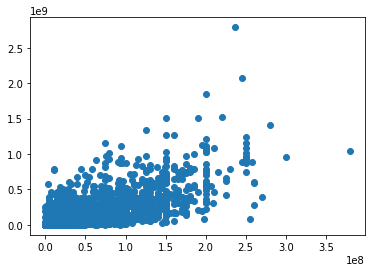

In [74]:
plt.scatter(new_df.budget, new_df.revenue)
#plt.plot(new_df.release_year, new_df.budget)
#plt.xlim(1910, 2020)
#plt.ylim(-5, 5)
plt.show()

In [75]:
#Some of the budget data are actually jpgs!?
#Other columns have the same issue
#This is why parse_number() exists, to convert valid numerics to float
#While converting these jpgs to none so they can be dropped
movies_metadata_df['budget'][19730]

'/ff9qCepilowshEtG2GYWwzt2bs4.jpg'

In [76]:
new_df = new_df.drop('release_date', axis = 1)
new_df.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_month,release_year,release_day,day_of_week
0,30000000.0,21.946943,373554033.0,81.0,7.7,5415.0,10,1995,30,0
1,65000000.0,17.015539,262797249.0,104.0,6.9,2413.0,12,1995,15,4
3,16000000.0,3.859495,81452156.0,127.0,6.1,34.0,12,1995,22,4
5,60000000.0,17.924927,187436818.0,170.0,7.7,1886.0,12,1995,15,4
8,35000000.0,5.231580,64350171.0,106.0,5.5,174.0,12,1995,22,4


In [77]:
new_df.isna().sum()

budget           0
popularity       0
revenue          0
runtime          0
vote_average     0
vote_count       0
release_month    0
release_year     0
release_day      0
day_of_week      0
dtype: int64

In [78]:
new_df.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_month,release_year,release_day,day_of_week
0,30000000.0,21.946943,373554033.0,81.0,7.7,5415.0,10,1995,30,0
1,65000000.0,17.015539,262797249.0,104.0,6.9,2413.0,12,1995,15,4
3,16000000.0,3.859495,81452156.0,127.0,6.1,34.0,12,1995,22,4
5,60000000.0,17.924927,187436818.0,170.0,7.7,1886.0,12,1995,15,4
8,35000000.0,5.231580,64350171.0,106.0,5.5,174.0,12,1995,22,4


In [79]:
new_df.to_pickle("../data/processed/lr_df.pkl")

## Number of films released by day of week

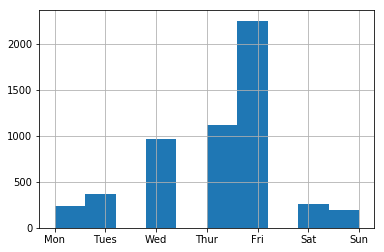

In [80]:
plt.figure()
new_df.day_of_week.hist()
plt.xticks(np.arange(7), ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.show()

## Creating categorical features for Tree model

In [81]:
new_df['profit'] = new_df.revenue - new_df.budget
new_df.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_month,release_year,release_day,day_of_week,profit
0,30000000.0,21.946943,373554033.0,81.0,7.7,5415.0,10,1995,30,0,343554033.0
1,65000000.0,17.015539,262797249.0,104.0,6.9,2413.0,12,1995,15,4,197797249.0
3,16000000.0,3.859495,81452156.0,127.0,6.1,34.0,12,1995,22,4,65452156.0
5,60000000.0,17.924927,187436818.0,170.0,7.7,1886.0,12,1995,15,4,127436818.0
8,35000000.0,5.231580,64350171.0,106.0,5.5,174.0,12,1995,22,4,29350171.0


In [82]:
new_df['profit_cat'] = new_df['profit'].apply(lambda x: 1 if x > 0 else 0)
new_df

,budget,popularity,revenue,runtime,vote_average,vote_count,release_month,release_year,release_day,day_of_week,profit,profit_cat
0,30000000.0,21.946943,373554033.0,81.0,7.7,5415.0,10,1995,30,0,343554033.0,1
1,65000000.0,17.015539,262797249.0,104.0,6.9,2413.0,12,1995,15,4,197797249.0,1
3,16000000.0,3.859495,81452156.0,127.0,6.1,34.0,12,1995,22,4,65452156.0,1
5,60000000.0,17.924927,187436818.0,170.0,7.7,1886.0,12,1995,15,4,127436818.0,1
8,35000000.0,5.231580,64350171.0,106.0,5.5,174.0,12,1995,22,4,29350171.0,1
9,58000000.0,14.686036,352194034.0,130.0,6.6,1194.0,11,1995,16,3,294194034.0,1
10,62000000.0,6.318445,107879496.0,106.0,6.5,199.0,11,1995,17,4,45879496.0,1
13,44000000.0,5.092000,13681765.0,192.0,7.1,72.0,12,1995,22,4,-30318235.0,0
14,98000000.0,7.284477,10017322.0,119.0,5.7,137.0,12,1995,22,4,-87982678.0,0
15,52000000.0,10.137389,116112375.0,178.0,7.8,1343.0,11,1995,22,2,64112375.0,1


In [83]:
new_df.to_pickle("../data/processed/rf_df.pkl")